# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'2.1.2'

### 초기화 되지 않은 행렬

In [3]:
x = torch.empty(4, 2)

print(x)

tensor([[1.4310e-06, 7.3008e-43],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


### 무작위로 초기화된 행렬

In [4]:
x = torch.rand(4, 2)

x

tensor([[0.1147, 0.2758],
        [0.8693, 0.9945],
        [0.2774, 0.8090],
        [0.6041, 0.7073]])

### dtype이 long, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)

x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [6]:
x = torch.tensor([3, 2.3])

x

tensor([3.0000, 2.3000])

In [7]:
x = x.new_ones(2, 4, dtype=torch.double)

x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [8]:
x = torch.randn_like(x, dtype=torch.float)

x

tensor([[ 3.7372e-01,  3.5296e-02, -5.8452e-04,  1.0070e+00],
        [ 1.3132e+00,  1.0702e+00, -1.3380e+00, -8.3950e-01]])

### 텐서의 크기

In [9]:
x.size()

torch.Size([2, 4])

## 텐서의 연산(operations)

### 덧셈 1

In [10]:
x

tensor([[ 3.7372e-01,  3.5296e-02, -5.8452e-04,  1.0070e+00],
        [ 1.3132e+00,  1.0702e+00, -1.3380e+00, -8.3950e-01]])

In [11]:
y = torch.rand(2, 4)

x + y

tensor([[ 0.9985,  0.7773,  0.6403,  1.7938],
        [ 1.7247,  1.9183, -1.1229, -0.2004]])

### 덧셈2

In [12]:
torch.add(x, y)

tensor([[ 0.9985,  0.7773,  0.6403,  1.7938],
        [ 1.7247,  1.9183, -1.1229, -0.2004]])

### 덧셈3
- 결과 텐서를 인자로 제공

In [13]:
res = torch.empty(2, 4)
torch.add(x, y, out=res)

res

tensor([[ 0.9985,  0.7773,  0.6403,  1.7938],
        [ 1.7247,  1.9183, -1.1229, -0.2004]])

### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [14]:
y.add_(x)

y

tensor([[ 0.9985,  0.7773,  0.6403,  1.7938],
        [ 1.7247,  1.9183, -1.1229, -0.2004]])

### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [15]:
x = torch.tensor([
    [1, 3],
    [5, 7]
])
y = torch.tensor([
    [2, 4],
    [6, 8]
])

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1, -1],
        [-1, -1]])
tensor([[-1, -1],
        [-1, -1]])
tensor([[-1, -1],
        [-1, -1]])


In [16]:
x = torch.tensor([
    [1, 3],
    [5, 7]
])
y = torch.tensor([
    [2, 4],
    [6, 8]
])

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2, 12],
        [30, 56]])
tensor([[ 2, 12],
        [30, 56]])
tensor([[ 2, 12],
        [30, 56]])


In [17]:
x = torch.tensor([
    [1, 3],
    [5, 7]
])
y = torch.tensor([
    [2, 4],
    [6, 8]
])

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [18]:
x = torch.tensor([
    [1, 3],
    [5, 7]
])
y = torch.tensor([
    [2, 4],
    [6, 8]
])

print(torch.mm(x, y))

tensor([[20, 28],
        [52, 76]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [19]:
x

tensor([[1, 3],
        [5, 7]])

In [20]:
x[:, 1]

tensor([3, 7])

### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [21]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [22]:
x = torch.randn(1)

print(x)
print(x.item())
print(x.dtype)

tensor([0.6099])
0.6099439263343811
torch.float32


- 스칼라값 하나만 존재해야함

In [23]:
x = torch.randn(2)

print(x)
print(x.item())
print(x.dtype)

tensor([ 0.6376, -0.9358])


RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

### squeeze
- 차원을 축소(제거)

In [24]:
tensor = torch.rand(1, 3, 3)

print(tensor)
print(tensor.shape)

tensor([[[0.8854, 0.3901, 0.0124],
         [0.0590, 0.4898, 0.7256],
         [0.2979, 0.2243, 0.8823]]])
torch.Size([1, 3, 3])


In [25]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.8854, 0.3901, 0.0124],
        [0.0590, 0.4898, 0.7256],
        [0.2979, 0.2243, 0.8823]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [26]:
tensor = torch.rand(1, 3, 3)

print(tensor)
print(tensor.shape)

tensor([[[0.0153, 0.6218, 0.3887],
         [0.1494, 0.8621, 0.7855],
         [0.6757, 0.4971, 0.5609]]])
torch.Size([1, 3, 3])


In [27]:
t = tensor.unsqueeze(dim=-1)

print(t)
print(t.shape)

tensor([[[[0.0153],
          [0.6218],
          [0.3887]],

         [[0.1494],
          [0.8621],
          [0.7855]],

         [[0.6757],
          [0.4971],
          [0.5609]]]])
torch.Size([1, 3, 3, 1])


### stack
- 텐서간 결합

In [28]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [29]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[ 0.6728, -0.0841, -1.8548],
          [-0.1220, -0.9065, -0.6837],
          [ 2.4295, -0.0611,  2.1966]]],


        [[[ 0.8516, -1.6974,  0.6676],
          [ 0.3726,  1.1184, -0.9332],
          [-0.6536,  2.0977, -0.9004]]]])
torch.Size([2, 1, 3, 3])


In [30]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=2)

print(c)
print(c.size())

tensor([[[-0.5253, -0.2388,  1.5052, -0.6816, -0.6290, -0.8005],
         [ 0.5139, -0.2577, -1.0455, -0.0715,  1.5177,  1.1481],
         [-0.0829,  0.2655, -0.4146,  0.6237,  1.9176, -0.7024]]])
torch.Size([1, 3, 6])


### chunk
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [31]:
tensor = torch.rand(3, 6)

t1, t2, t3 = torch.chunk(tensor, chunks=3, dim=1) # 3개로 나눔

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.0449, 0.0979, 0.5548, 0.9884, 0.4083, 0.8369],
        [0.6354, 0.2736, 0.7363, 0.4809, 0.4440, 0.8203],
        [0.0294, 0.1689, 0.3818, 0.9887, 0.7583, 0.9806]])
tensor([[0.0449, 0.0979],
        [0.6354, 0.2736],
        [0.0294, 0.1689]])
tensor([[0.5548, 0.9884],
        [0.7363, 0.4809],
        [0.3818, 0.9887]])
tensor([[0.4083, 0.8369],
        [0.4440, 0.8203],
        [0.7583, 0.9806]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [32]:
tensor = torch.rand(3, 6)

t1, t2 = torch.split(tensor, 3, dim=1) # 크기가 3

print(tensor)
print(t1)
print(t2)

tensor([[0.8331, 0.4758, 0.7245, 0.5956, 0.0717, 0.2442],
        [0.6524, 0.4893, 0.8779, 0.5671, 0.7829, 0.9780],
        [0.4382, 0.1585, 0.6607, 0.9421, 0.9835, 0.1559]])
tensor([[0.8331, 0.4758, 0.7245],
        [0.6524, 0.4893, 0.8779],
        [0.4382, 0.1585, 0.6607]])
tensor([[0.5956, 0.0717, 0.2442],
        [0.5671, 0.7829, 0.9780],
        [0.9421, 0.9835, 0.1559]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [33]:
a = torch.ones(7)

a

tensor([1., 1., 1., 1., 1., 1., 1.])

In [34]:
b = a.numpy()

b

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [35]:
a.add_(1)

print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [36]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [37]:
x = torch.randn(1)

print(x)
print(x.item())
print(x.dtype)

tensor([1.2971])
1.2970566749572754
torch.float32


In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y

print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([2.2971], device='cuda:0')
tensor([2.2971], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [39]:
x = torch.ones(3, 3, requires_grad=True)

x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [40]:
y = x + 5

y

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)

In [41]:
y.grad_fn

In [42]:
z = y * y * 2
out = z.mean()

z, out

(tensor([[72., 72., 72.],
         [72., 72., 72.],
         [72., 72., 72.]], grad_fn=<MulBackward0>),
 tensor(72., grad_fn=<MeanBackward0>))

- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [43]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))

print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [44]:
out.backward()

In [45]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [46]:
x = torch.randn(3, requires_grad=True)
y = x * 2

while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-469.1675,  500.1066, 1789.2368], grad_fn=<MulBackward0>)


In [47]:
v = torch.tensor([.1, 1., .0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [48]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [49]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [50]:
a = torch.ones(2, 2)

a

tensor([[1., 1.],
        [1., 1.]])

In [51]:
a = torch.ones(2, 2, requires_grad=True)

a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [52]:
print(f"a.data: {a}")
print(f"a.grad: {a.grad}")
print(f"a.grad_fn: {a.grad_fn}")

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [53]:
b = a + 2

b

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

- $c = b^2$

In [54]:
c = b ** 2

c

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)

In [55]:
out = c.sum()

out

tensor(36., grad_fn=<SumBackward0>)

In [56]:
out.backward()

- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [57]:
print(f"a.data: {a}")
print(f"a.grad: {a.grad}")
print(f"a.grad_fn: {a.grad_fn}")

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [58]:
print(f"b.data: {b}")
print(f"b.grad: {b.grad}")
print(f"b.grad_fn: {b.grad_fn}")

b.data: tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
b.grad: None
b.grad_fn: <AddBackward0 object at 0x000001DF8953B520>


C:\Users\kksoo\AppData\Local\Temp\ipykernel_26232\1161871019.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"b.grad: {b.grad}")


In [59]:
print(f"c.data: {c}")
print(f"c.grad: {c.grad}")
print(f"c.grad_fn: {c.grad_fn}")

c.data: tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
c.grad: None
c.grad_fn: <PowBackward0 object at 0x000001DF8953B6D0>


C:\Users\kksoo\AppData\Local\Temp\ipykernel_26232\4094414223.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"c.grad: {c.grad}")


In [60]:
print(f"out.data: {out}")
print(f"out.grad: {out.grad}")
print(f"out.grad_fn: {out.grad_fn}")

out.data: 36.0
out.grad: None
out.grad_fn: <SumBackward0 object at 0x000001DFDE741C30>


C:\Users\kksoo\AppData\Local\Temp\ipykernel_26232\2468207993.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"out.grad: {out.grad}")


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [61]:
x = torch.ones(3, requires_grad=True)
y = x ** 2
z = y ** 2 + x
out = z.sum()

out

tensor(6., grad_fn=<SumBackward0>)

In [62]:
grad = torch.Tensor([.1, 1, 100])
z.backward(grad)

In [63]:
print(f"x.data: {x}")
print(f"x.grad: {x.grad}")
print(f"x.grad_fn: {x.grad_fn}")

x.data: tensor([1., 1., 1.], requires_grad=True)
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [64]:
print(f"y.data: {y}")
print(f"y.grad: {y.grad}")
print(f"y.grad_fn: {y.grad_fn}")

y.data: tensor([1., 1., 1.], grad_fn=<PowBackward0>)
y.grad: None
y.grad_fn: <PowBackward0 object at 0x000001DF8953B820>


C:\Users\kksoo\AppData\Local\Temp\ipykernel_26232\3136568828.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"y.grad: {y.grad}")


In [65]:
print(f"z.data: {z}")
print(f"z.grad: {z.grad}")
print(f"z.grad_fn: {z.grad_fn}")

z.data: tensor([2., 2., 2.], grad_fn=<AddBackward0>)
z.grad: None
z.grad_fn: <AddBackward0 object at 0x000001DF8953B7C0>


C:\Users\kksoo\AppData\Local\Temp\ipykernel_26232\1868787741.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"z.grad: {z.grad}")


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능



### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [66]:
import torch.nn as nn

- Convolution Layer 예시 (1)


In [67]:
m = nn.Conv2d(16, 33, 3, 2)
m = nn.Conv2d(16, 33, (3, 5), (2, 1), (4, 2))
m = nn.Conv2d(16, 33, (3, 5), (2, 1), (4, 2), (3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)

In [68]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [69]:
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [70]:
filters = torch.randn(8, 4, 3, 3)

In [71]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [72]:
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [73]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [74]:
import torch
from torch.utils.data import Dataset, DataLoader

In [75]:
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [76]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [77]:
data_iter = iter(train_loader)
imgs, labels = next(data_iter)
imgs.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [78]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [79]:
torch_img = torch.squeeze(imgs[0])

torch_img.shape

torch.Size([28, 28])

In [80]:
img = torch_img.numpy()

img.shape

(28, 28)

In [81]:
label = labels[0].numpy()

label.shape

()

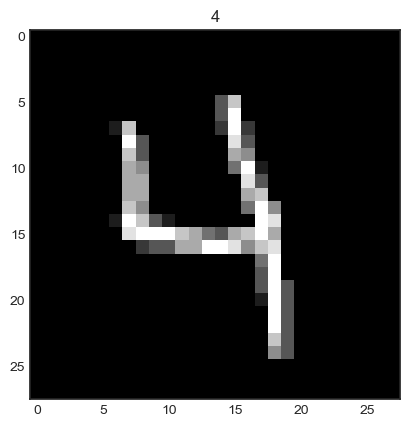

In [82]:
plt.title(label)
plt.imshow(img, 'gray')

plt.show()

## 각 Layer 설명

In [83]:
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [84]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [86]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))

layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [91]:
weight = layer.weight

weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [92]:
weight = weight.detach().numpy()

weight.shape

(20, 1, 5, 5)

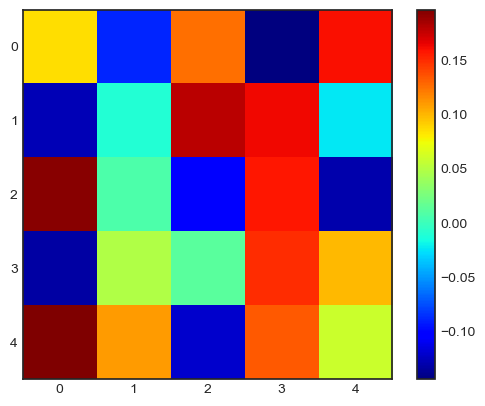

In [93]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [94]:
print(imgs.shape)

torch.Size([8, 1, 28, 28])


In [95]:
input_img = torch.unsqueeze(imgs[0], dim=0)

In [96]:
output_data = layer(input_img)

In [97]:
output = output_data.data

In [98]:
output_arr = output.numpy()

output_arr.shape

(1, 20, 24, 24)

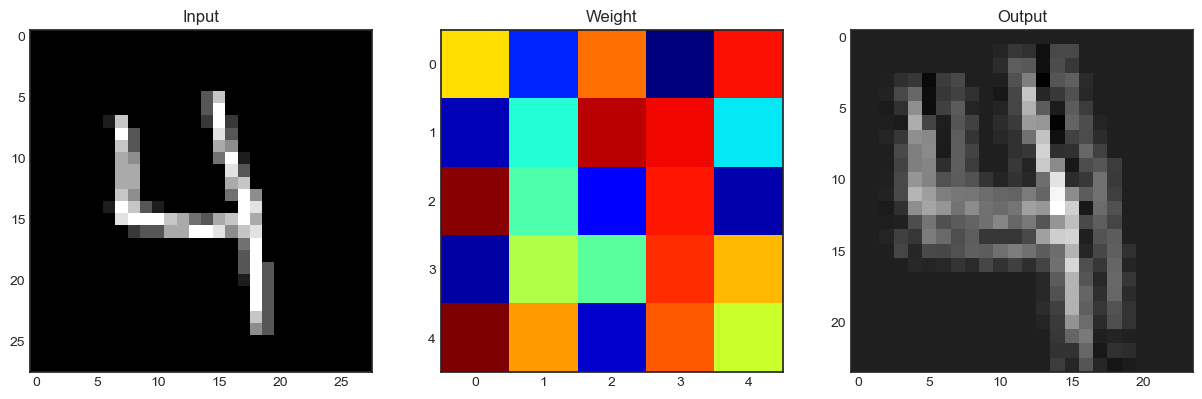

In [99]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(img, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()

### Pooling
- `F.max_pool2d`
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [100]:
img.shape

(28, 28)

In [101]:
pool = F.max_pool2d(output, 2, 2)

pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [102]:
pool_arr = pool.numpy()

pool_arr.shape

(1, 20, 12, 12)

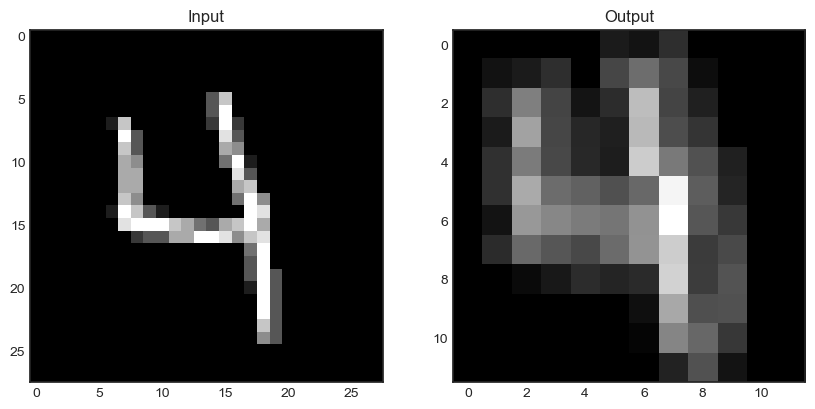

In [103]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("Input")
plt.imshow(img, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [104]:
img = torch.from_numpy(img)

img.shape

torch.Size([28, 28])

In [105]:
flatten = img.view(1, 28 * 28)

flatten.shape

torch.Size([1, 784])

In [106]:
lin = nn.Linear(784, 10)(flatten)

lin.shape

torch.Size([1, 10])

In [107]:
lin

tensor([[-0.3457,  0.7746,  0.3243,  0.2197,  0.4298, -0.2236,  1.9406,  0.3112,
         -0.8108,  1.4983]], grad_fn=<AddmmBackward0>)

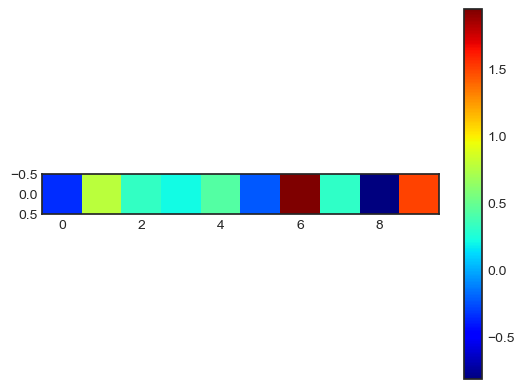

In [108]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [109]:
with torch.no_grad():
    flatten = img.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [110]:
softmax

tensor([[0.0446, 0.0951, 0.0763, 0.1319, 0.1350, 0.0693, 0.0430, 0.0194, 0.2055,
         0.1800]])

In [112]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [113]:
inputs = torch.randn(4, 3, 28, 28).to(device)

inputs.shape

torch.Size([4, 3, 28, 28])

In [114]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))

output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

